In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup 
import re
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from selenium import webdriver
driver = webdriver.Chrome()
url = "https://ko.wikipedia.org/wiki/%EC%82%AC%EB%9E%91"

In [3]:
driver.get(url)

In [4]:
html = driver.page_source

In [5]:
soup = BeautifulSoup(html, 'html.parser')

In [6]:
lovelist = []
for love in soup.select('p:nth-child(8) , .tright+ p'):
    lovelist.append(love.text.strip())
lovelist = ' '.join(lovelist)

In [7]:
for letter in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ()"":,':
    lovelist=lovelist.replace(letter, ' ')
lovelist

'사랑은 깊은 상호 인격적인 애정                                 에서 단순한 즐거움까지를 아울러서 강하며 긍정적으로 경험된 감정적 정신적 상태이다. 즉 좋아하고 소중히 여기는 마음을 말한다. 반대말은 학대 등을 포함한 무관심이다. 비슷한 말은 애정 등을 포함한 사랑이다. 대표적인 예로 모성애  가족  또는 연인에 대한 사랑을 들 수 있다. 넓은 의미에서는 사람 또는 동식물 이외의 대상  즉  조국이나 사물에 대한 사랑도 포함된다. 한국어의 명사  사랑 의 옛말은  다솜 이며  동사  사랑하다 의 옛말은  괴다 이다.  괴다    고이다 의 원뜻은  생각하다 인데  이는 사랑한다는 것이란 곧 누군가를 끊임 없이 생각하고 웃음이 난다 라는 생각을 담고 있다.  에로스 는 감각적인 욕구와 갈망을 가진 열정적인 사랑을 뜻한다. 현대 그리스어         는 낭만적인 사랑을 뜻한다.         은       에서 파생된 용어이다. 고전적 세계에 있어서  사랑이라는 현상은 일반적으로 광기 또는 테이아 마니아 고대 그리스어               신들로부터의 광기 로 이해되었다. 이 사랑의 열정은 은유적이고 신화적인  사랑의 화살    사랑의 과녁 으로 묘사된다. 본래 에로스는 그리스 신화 속에 나오는 사랑의 신 이름이다. 플라톤에 있어서는 이데아로 가고싶은 상태를 에로스라고 한다.'

In [8]:
kkma = Kkma()


def make_corpus(text):
    corpus = []
    for s in text.split('.'):
        corpus.append(['/'.join(p) for p in kkma.pos(s)])
    return corpus

corpus=make_corpus(lovelist)

In [9]:
Skip_Gram_model = Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

In [10]:
words = Skip_Gram_model.wv.index2word
words

['이/VCP',
 'ㄴ/ETD',
 '사랑/NNG',
 '다/EFN',
 '은/JX',
 '을/JKO',
 '의/JKG',
 '하/XSV',
 'ㄴ다/EFN',
 '되/XSV',
 '고/ECE',
 '에/JKM',
 '는/JX',
 '은/ETD',
 '에서/JKM',
 '를/JKO',
 '어서/ECD',
 '으로/JKM',
 '포함/NNG',
 '또는/MAG',
 '의/NNG',
 '다/ECS',
 '생각/NNG',
 '에로스/NNG',
 '그리스/NNG',
 '적/XSN',
 '애정/NNG',
 '며/ECE',
 '상태/NNG',
 '즉/MAG',
 '는/ETD',
 '등/NNB',
 '로/JKM',
 '대하/VV',
 '있/VXV',
 '옛말/NNG',
 '라는/ETD',
 '늘/VV',
 '뜻하/VV',
 '있/VV',
 '광기/NNG',
 '로/NNG']

In [11]:
vectors = Skip_Gram_model.wv.vectors
vectors

array([[ 1.0015552 , -0.44224772],
       [ 1.5328741 ,  0.7049728 ],
       [ 1.0134015 , -0.35957453],
       [ 1.0424353 , -0.45074707],
       [ 0.98103535, -0.9867414 ],
       [ 1.3853128 ,  0.58295596],
       [ 1.0472457 , -0.5042041 ],
       [ 0.9928193 , -0.95125794],
       [ 1.5853034 ,  0.80989593],
       [ 1.1323078 , -0.2354458 ],
       [ 1.0654364 , -0.6650354 ],
       [ 1.2953047 ,  0.11413362],
       [ 1.0696057 , -0.43234304],
       [ 1.3961085 ,  0.20728235],
       [ 1.2596306 ,  0.05444531],
       [ 1.1061947 , -0.4432381 ],
       [ 1.1834432 , -0.3575906 ],
       [ 1.0789407 , -0.6334587 ],
       [ 1.3315694 ,  0.48959202],
       [ 1.1890746 , -0.14954577],
       [ 1.195904  , -2.2557607 ],
       [ 1.1967595 , -2.3401887 ],
       [ 1.1040455 , -1.7183479 ],
       [ 1.4908383 ,  0.64112335],
       [ 1.1598701 , -0.03185156],
       [ 1.0965778 , -0.24446638],
       [ 1.3121076 ,  0.26526755],
       [ 0.9340291 , -1.135753  ],
       [ 1.2547307 ,

In [12]:
Skip_Gram_model_result = dict(zip(words, vectors))

In [15]:
Skip_Gram_model.most_similar('사랑/NNG', topn=20)#코사인 유사도
'''
그나마 유사한 것이 그리스 인것 같다... 그 외에는 조사나 별 의미없는 것들이 많다.. 한국어가 형태소 단위라 더 
의미를 뽑아내기가 어려운 것 같다.
'''


C:\Users\j3eun\Anaconda3\envs\Herobots\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('있/VV', 0.9994214773178101),
 ('를/JKO', 0.9991946220397949),
 ('는/JX', 0.9990684390068054),
 ('어서/ECD', 0.9988709688186646),
 ('다/EFN', 0.99774569272995),
 ('이/VCP', 0.9971998333930969),
 ('있/VXV', 0.9961589574813843),
 ('의/JKG', 0.9942014217376709),
 ('적/XSN', 0.992614209651947),
 ('되/XSV', 0.9907732009887695),
 ('으로/JKM', 0.9820179343223572),
 ('또는/MAG', 0.9767943024635315),
 ('고/ECE', 0.9765357971191406),
 ('그리스/NNG', 0.9512577652931213),
 ('상태/NNG', 0.9367543458938599),
 ('에서/JKM', 0.9271142482757568),
 ('하/XSV', 0.9118364453315735),
 ('에/JKM', 0.9094453454017639),
 ('은/JX', 0.901602566242218),
 ('로/JKM', 0.8851694464683533)]

In [56]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,이/VCP,1.242133,0.157875
1,ㄴ/ETD,0.981048,-0.733192
2,사랑/NNG,1.161178,0.050113
3,다/EFN,1.173505,-0.032731
4,의/JKG,1.390570,0.513913
5,은/JX,1.501802,0.613210
6,을/JKO,0.943897,-0.756557
7,ㄴ다/EFN,0.948892,-1.218064
8,하/XSV,1.269177,0.067648
9,되/XSV,1.140061,-0.307716


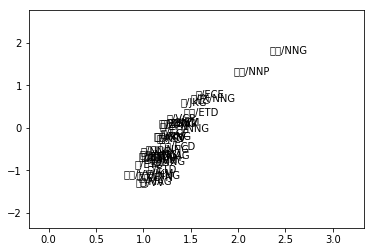

In [59]:
fig, ax = plt.subplots()
for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()